# Challenge 1:  
## Revisiting introduction to python: data of eye-gaze trajectories 
### A possible solution by Pedro Lencastre, Oslo, September 2021

In [81]:
#importing some useful libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import functools
import pandas as pd
import itertools
import sklearn
import copy
pd.options.mode.chained_assignment = None 
import matplotlib as mpl

In [4]:
#reading the data
data= pd.read_csv("Participant0002.tsv",sep="\t")

In [5]:
#first data overview
data.columns

Index(['Recording timestamp', 'Computer timestamp', 'Sensor', 'Project name',
       'Export date', 'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Average calibration accuracy (mm)',
       'Average calibration precision SD (mm)',
       'Average calibration precision RMS (mm)',
       'Average calibration accuracy (degrees)',
       'Average calibration precision SD (degrees)',
       'Average calibration precision RMS (degrees)',
       'Average calibration accuracy (pixels)',
       'Average calibration precision SD (pixels)',
       'Average calibration precision RMS (pixels)',
       'Average validation accuracy (mm)',
       'Average validation precision SD (mm)',
       'A

In [6]:
#selecting the relevant parts of the dataset
nndata = data[['Eyetracker timestamp','Gaze point X','Gaze point Y']]

In [7]:
nndata.shape

(46556, 3)

In [8]:
#remove NaN
new_data = nndata.dropna()

In [9]:
new_data.shape

(41174, 3)

In [10]:
T = new_data['Eyetracker timestamp']
X = new_data['Gaze point X']
Y = new_data['Gaze point Y']

#numpy code
#X = X[np.logical_not(np.isnan(X))]
#Y = Y[np.logical_not(np.isnan(Y))]
#T = T[np.logical_not(np.isnan(T))]

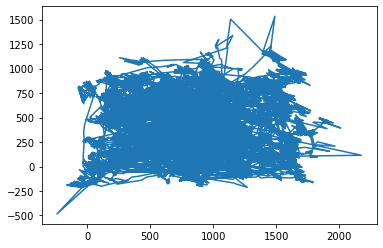

In [11]:
plt.plot(X,Y)
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')

Text(0.5, 0, 'y position')

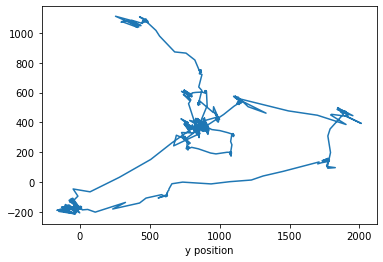

In [82]:
plt.plot(X[0:1000],Y[0:1000])
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')

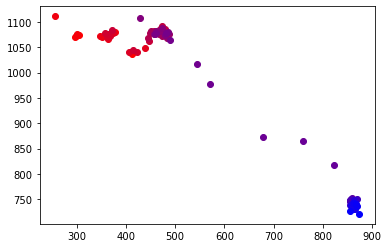

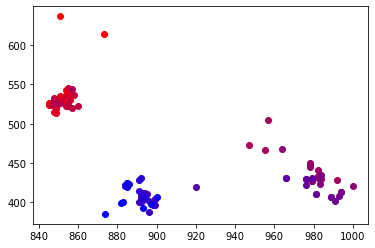

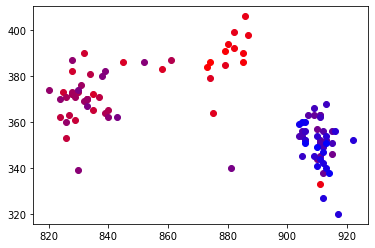

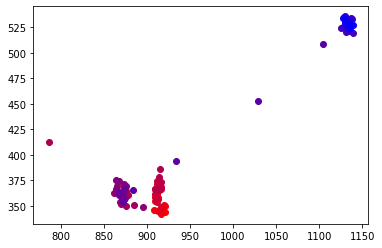

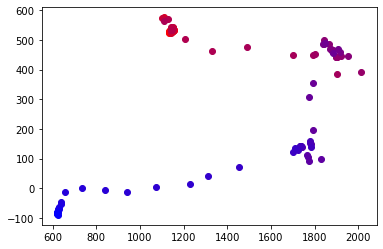

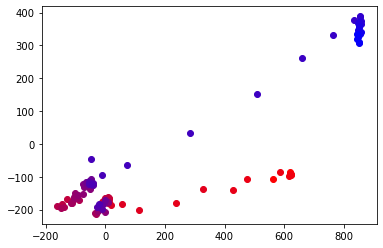

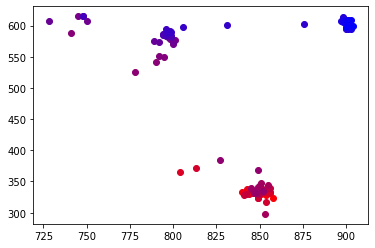

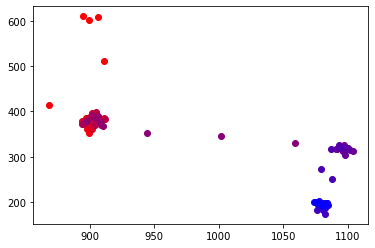

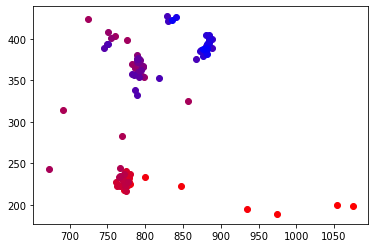

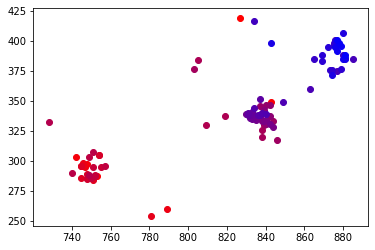

In [51]:
interval = 100
n_pics = 10
for i in range(n_pics):
    for j in range(interval):
        plt.scatter(X[(i*interval)+j:(i*interval)+j+1],Y[(i*interval)+j:(i*interval)+j+1],color=(1- 1.0*j/interval,0,1.0*j/interval))
    plt.xlabel('x position (pixels)')
    plt.ylabel('y position (pixels)')
    plt.show()
    
    

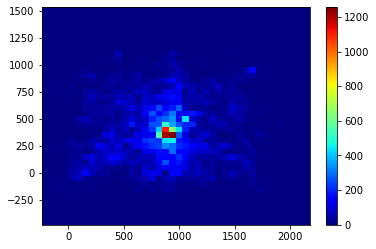

In [14]:
plt.hist2d(X, Y, bins=(40, 40), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('x position')
plt.xlabel('y position')
plt.show()

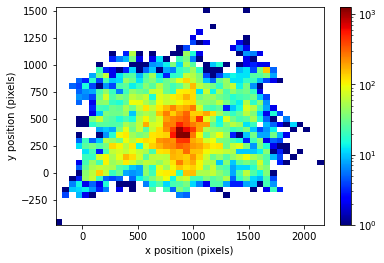

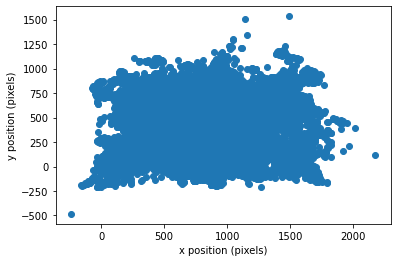

In [83]:
plt.hist2d(X, Y, bins=(40, 40),norm=mpl.colors.LogNorm(), cmap=plt.cm.jet)
#plt.xscale('log')
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.show()
plt.scatter(X,Y)
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.show()

# ANALYSIS OF VELOCITIES

In [15]:
#compute increments of position and time

dif_data = new_data.diff()

#numpy code
#dX = np.diff(X)
#dY = np.diff(Y)
#dT = np.diff(T)
#dS = np.sqrt(np.diff(X)**2 + np.diff(Y)**2)



In [87]:
velocities = dif_data[['Gaze point X','Gaze point Y']].div(dif_data['Eyetracker timestamp'], axis=0)

#numpy code
#vx = dX/dT
#vy = dY/dT
#vs = dS/dT

In [88]:
velocities.describe()

,Gaze point X,Gaze point Y
count,4.117300e+04,41173.000000
mean,3.726592e-07,-0.000011
std,4.095846e-03,0.003870
min,-5.340502e-02,-0.051649
25%,-8.383234e-04,-0.001080
50%,0.000000e+00,0.000000
75%,8.346250e-04,0.001083
max,5.780485e-02,0.052943


In [17]:
vx = velocities['Gaze point X']
vy = velocities['Gaze point Y']
v = np.sqrt(vx**2 + vy**2)

Text(0, 0.5, 'vertical velocity (pixel per milisecond)')

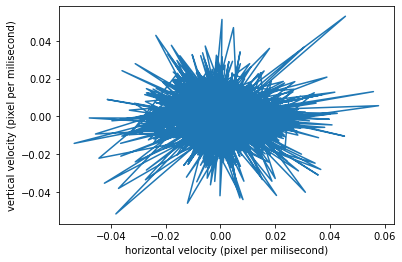

In [89]:
plt.plot(vx,vy)
plt.xlabel('horizontal velocity (pixel per milisecond)')
plt.ylabel('vertical velocity (pixel per milisecond)')
#is this a good way to plot the data? How would you do it?

In [70]:
#another simple way to remove NaNs. 
vx = vx[vx == vx]
vy = vy[vy == vy]

In [77]:
#vx, vy correlation. How do you interpret this?
np.corrcoef(vx,vy)[0,1]

-0.2278098632291584

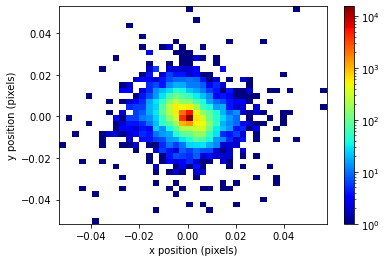

In [85]:
#Can you see the corelation with this graphic? 
#Does the image bellow look like a circle or like an elipse? 
#Does this indicate correlation?
plt.hist2d(vx, vy, bins=(40, 40),norm=mpl.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('vx (pixels / miliseconds)')
plt.ylabel('vy (pixels / miliseconds)')
plt.colorbar()
plt.show()


Text(0, 0.5, 'correlation coefficient')

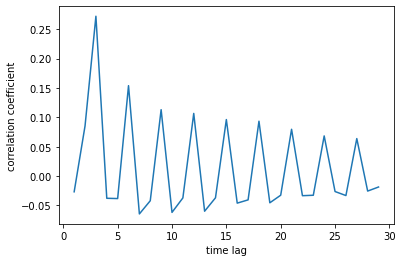

In [90]:
#Auto-correlations. Do you understand what it means via this code? 
corr_vx = []
for i in range(1,30):
    corr_vx.append(np.corrcoef(vx[i:],vx[:-i])[1,0])
plt.plot(np.arange(1,30),corr_vx)
plt.xlabel('time lag')
plt.ylabel('correlation coefficient')

In [20]:
#Let us look now at the absolute value of the velocity, which we will cal speed
speed = velocities.abs()
speed.describe()

,Gaze point X,Gaze point Y
count,41173.000000,41173.000000
mean,0.002178,0.002233
std,0.003469,0.003161
min,0.000000,0.000000
25%,0.000244,0.000363
50%,0.000837,0.001081
75%,0.002519,0.002759
max,0.057805,0.052943


In [21]:
sx = speed['Gaze point X']
sy = speed['Gaze point Y']
sd = sx**2 + sy**2

In [93]:
sx  = sx[sx==sx]
sy  = sy[sy==sy]

In [94]:
np.corrcoef(sx,sy)[0,1]

0.477093111503442

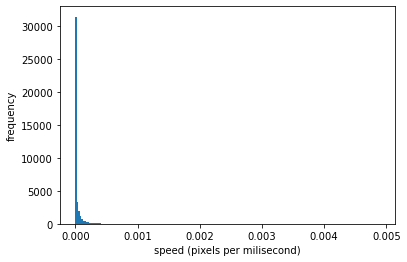

In [99]:
plt.hist(sd,200)
plt.xlabel('speed (pixels per milisecond)')
plt.ylabel('frequency')
plt.show()

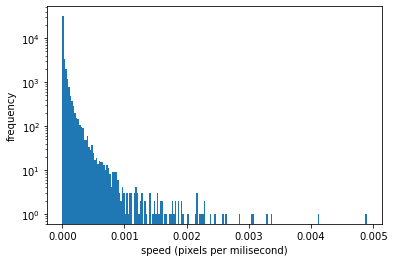

In [97]:
#notice the difference in scales
plt.hist(sd,200)
plt.xlabel('speed (pixels per milisecond)')
plt.ylabel('frequency')
plt.yscale('log')
plt.show()

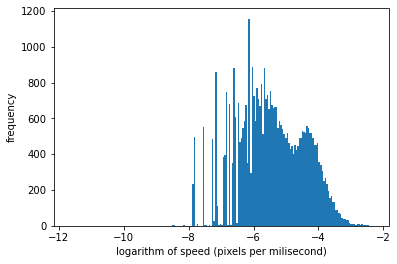

In [98]:
#We can also take the logarithm of the velocity instead. 
plt.hist(np.log10(sd[sd>0]),200)
plt.xlabel('logarithm of speed (pixels per milisecond)')
plt.ylabel('frequency')
plt.show()